# Instagram Reach Forecasting

Instagram reach forecasting is the process of predicting the number of people that an Instagram post, story, or other content will be reached, based on historical data and various other factors.

For content creators and anyone using Instagram professionally, predicting the reach can be valuable for planning and optimizing their social media strategy. By understanding how their content is performing, creators can make informed decisions about when to publish, what types of content to create, and how to engage their audience. It can lead to increased engagement, better performance metrics, and ultimately, greater success on the platform.

In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv('/Users/riteshkumar/Downloads/ML projects/Instagram Reach analysis/Instagram forecast analysis.csv')


In [2]:
data.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [3]:
#Convert date column to datetime datatype 

data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0     2022-04-01
1     2022-04-02
2     2022-04-03
3     2022-04-04
4     2022-04-05
         ...    
360   2023-03-27
361   2023-03-28
362   2023-03-29
363   2023-03-30
364   2023-03-31
Name: Date, Length: 365, dtype: datetime64[ns]

# Analyzing Reach

Let’s analyze the trend of Instagram reach over time using a line chart:

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], 
                         y=data['Instagram reach'], 
                         mode='lines', name='Instagram reach'))
fig.update_layout(title='Instagram Reach Trend', xaxis_title='Date', 
                  yaxis_title='Instagram Reach')
fig.show()

In [5]:
#Now let’s analyze Instagram reach for each day using a bar chart:

fig = go.Figure()
fig.add_trace(go.Bar(x=data['Date'], 
                     y=data['Instagram reach'], 
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach by Day', 
                  xaxis_title='Date', 
                  yaxis_title='Instagram Reach')
fig.show()

In [6]:
# Now let’s analyze the distribution of Instagram reach using a box plot:

fig = go.Figure()
fig.add_trace(go.Box(y=data['Instagram reach'], 
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach Box Plot', 
                  yaxis_title='Instagram Reach')
fig.show()

Now let’s create a day column and analyze reach based on the days of the week. To create a day column, we can use the dt.day_name() method to extract the day of the week from the Date column

In [ ]:
# Day name
data['Day'] = data['Date'].dt.day_name()
data.head()


,Date,Instagram reach,Day
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday


Now let’s analyze the reach based on the days of the week. For this, we can group the DataFrame by the Day column and calculate the mean, median, and standard deviation of the Instagram reach column for each day

In [8]:
import numpy as np

day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
day_stats.head()

,Day,mean,median,std
0,Friday,46666.849057,35574.0,29856.943036
1,Monday,52621.692308,46853.0,32296.071347
2,Saturday,47374.750000,40012.0,27667.043634
3,Sunday,53114.173077,47797.0,30906.162384
4,Thursday,48570.923077,39150.0,28623.220625


Now, let’s create a bar chart to visualize the reach for each day of the week

In [9]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['mean'], 
                     name='Mean'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['median'], 
                     name='Median'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['std'], 
                     name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week', 
                  xaxis_title='Day', 
                  yaxis_title='Instagram Reach')
fig.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

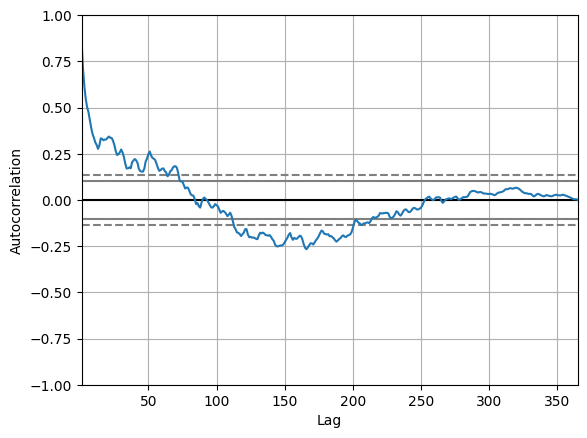

In [10]:
# Now here’s how to visualize an autocorrelation plot to find the value of p

pd.plotting.autocorrelation_plot(data["Instagram reach"])